### Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Get Data

In [33]:
train = pd.read_csv("../../data/train.csv")
test = pd.read_csv("../../data/test.csv")

### Data Exploration

In [34]:
n_train = train.shape[0]
print("The train dataset has %d features and %d records." % (train.shape[1]-1, train.shape[0]))

print("The train dataset has %d records." % test.shape[0])

The train dataset has 80 features and 1460 records.
The train dataset has 1459 records.


In [35]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<ol>
    <li>Separating the dependent variable <code>SalePrice</code> from the <i>train</i> feature matrix.
    <li>Combining the <i>train</i> and <i>test</i> dataset.
</ol>

In [36]:
y_train = train['SalePrice']

dat = pd.concat([train.iloc[:,:-1], test])

print('The count of data types of the features of the combined dataset: \n\n', dat.dtypes.value_counts())

The count of data types of the features of the combined dataset: 

 object     43
int64      26
float64    11
dtype: int64


In [37]:
print('Summary Statistics for combined dataset for columns with object datatype')
dat.describe(include = 'object').T

Summary Statistics for combined dataset for columns with object datatype


,count,unique,top,freq
MSZoning,2915,5,RL,2265
Street,2919,2,Pave,2907
Alley,198,2,Grvl,120
LotShape,2919,4,Reg,1859
LandContour,2919,4,Lvl,2622
Utilities,2917,2,AllPub,2916
LotConfig,2919,5,Inside,2133
LandSlope,2919,3,Gtl,2778
Neighborhood,2919,25,NAmes,443
Condition1,2919,9,Norm,2511


In [38]:
print('Summary Statistics for combined dataset for columns with int64 datatype')
dat.describe(include = 'int64').T

Summary Statistics for combined dataset for columns with int64 datatype


,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
1stFlrSF,2919.0,1159.581706,392.362079,334.0,876.0,1082.0,1387.5,5095.0
2ndFlrSF,2919.0,336.483727,428.701456,0.0,0.0,0.0,704.0,2065.0
LowQualFinSF,2919.0,4.694416,46.396825,0.0,0.0,0.0,0.0,1064.0


In [39]:
print('Summary Statistics for combined dataset columns with float64 datatype')
dat.describe(include = 'float64').T

Summary Statistics for combined dataset columns with float64 datatype


,count,mean,std,min,25%,50%,75%,max
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0
BsmtUnfSF,2918.0,560.772104,439.543659,0.0,220.0,467.0,805.5,2336.0
TotalBsmtSF,2918.0,1051.777587,440.766258,0.0,793.0,989.5,1302.0,6110.0
BsmtFullBath,2917.0,0.429894,0.524736,0.0,0.0,0.0,1.0,3.0
BsmtHalfBath,2917.0,0.061364,0.245687,0.0,0.0,0.0,0.0,2.0
GarageYrBlt,2760.0,1978.113406,25.574285,1895.0,1960.0,1979.0,2002.0,2207.0
GarageCars,2918.0,1.766621,0.761624,0.0,1.0,2.0,2.0,5.0


Referring to the details in the <b>Data Description</b> file and comparing it with the data types in various feature columns detailed above, there is a mismatch between what the data type is and what it should be. The following changes need to be made to the feature data types to align them with what is intended by the description:
<ol>
    <li> The datatype of the columns <code>MSSubClass, MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition</code> should be of type <b>category</b>.
    <li> The datatype of the columns <code>YearBuilt, YearRemodAdd, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, Bedroom, Kitchen, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, MoSold, YrSold</code> should be of type <b>int64</b>.
    <li> The datatype of the columns <code>LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal</code> should be of type <b>float64</b>.
</ol>
For each of these three sets of features we ascertain the details of the missing values.

In [40]:
'''int_64_feats = ['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Bedroom', 
                'Kitchen', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold']
dat[int_64_feats].isna().sum()

dat[['Kitchen', 'Bedroom']].head()
dat[['KitchenAbvGr', 'BedroomAbvGr']].head()

# It turns out that there is a mismatch between the column names in the Data Description file and the column names
# in the dataset. 'Kitchen' in the Data Description file refers to 'KitchenAbvGr' in the dataset; similarly 
# Bedroom' refers to 'BedroomAbvGr'''

int_64_feats = ['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                'MoSold', 'YrSold']
print('\nThe summary of missing values in features that should be of type int64:\n\n',
      dat[int_64_feats].isna().sum())

float_64_feats = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
                  'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
print('\nThe summary of missing values in features that should be of type float64:\n\n',
      dat[float_64_feats].isna().sum())

cat_feats = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
             'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 
             'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 
             'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
             'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 
             'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 
             'MiscFeature', 'SaleType', 'SaleCondition']
print('\nThe summary of missing values in features that should be of type category:\n\n',
      dat[cat_feats].isna().sum())



The summary of missing values in features that should be of type int64:

 YearBuilt         0
YearRemodAdd      0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt     159
GarageCars        1
MoSold            0
YrSold            0
dtype: int64

The summary of missing values in features that should be of type float64:

 LotFrontage      486
LotArea            0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
dtype: int64

The summary of missing values in features that should be of type category:

 MSSubClass          0
MSZoning            4
Street              0

### Imputing Missing Values

#### Correcting <i>Incorrect</i> NAs

From the <b>Data Description</b> file we note that the features <code>Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Alley, MiscFeature, GarageYrBlt</code> can take value <b>NA</b> that indicates absence of the relevant feature. However, <b>NA</b> has a specific meaning when used in analysis and hence for all records that report <b>NA</b> in any of the features mentioned above, we would want to rewrite <b>NA</b> to <b>ABSNT</b> to better convey the meaning. Similarly, <code>MasVnrType</code> can take value <b>None</b> which we can rewrite as <b>ABSNT</b>.  

However, care needs to be taken that a genuine <b>NA</b> is not replaced. To that end, we use obvious relationship between features to deduce a genuine <b>NA</b> as follows:
<ul>
    <li> For <code>BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2</code> we ascertain if the corresponding <code>TotalBsmtSF</code> = 0, and if it is, then for the respective feature we replace the <b>NA</b> by <b>ABSNT</b>.
    <li> For <code>FireplaceQu</code> we ascertain if the corresponding <code>Fireplaces</code> = 0, and if it is, then we replace the <b>NA</b> by <b>ABSNT</b>.
    <li> For <code>GarageType, GarageFinish, GarageQual, GarageCond, GarageYrBlt</code> we ascertain if the corresponding <code>GarageArea</code> = 0, and if it is, then for the respective feature we replace the <b>NA</b> by <b>ABSNT</b>.
    <li> For <code>PoolQC</code> we ascertain if the corresponding <code>PoolArea</code> = 0, and if it is then we replace the <b>NA</b> by <b>ABSNT</b>.
    <li> For <code>MiscFeature</code> we ascertain if the corresponding <code>MiscVal</code> = 0, and if it is then we replace the <b>NA</b> by <b>ABSNT</b>.
    <li> For <code>MasVnrType</code> we ascertain if the corresponding <code>MasVnrArea</code> = 0, and if it is, then we replace the <b>NA</b> by <b>ABSNT</b>.
    <li> Finally for features, <code>Alley, Fence</code>, because we can't find an obvious relationship with any other features we replace all <b>NA</b> with <b>ABSNT</b>.

We once again, for each of these three sets of features, we ascertain the details of the missing values.

In [41]:
NA_feats = [['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'],['FireplaceQu'], 
            ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt'], ['PoolQC'], 
            ['MiscFeature'], ['MasVnrType']]
val_feats = ['TotalBsmtSF', 'Fireplaces', 'GarageArea', 'PoolArea', 'MiscVal', 'MasVnrArea']

for i in range(len(NA_feats)):
    for j in range(len(NA_feats[i])):
        dat.loc[(dat.loc[:, NA_feats[i][j]].isna()) & (dat.loc[:, val_feats[i]] == 0), [NA_feats[i][j]]] = 'ABSNT'
        
dat.loc[(dat.loc[:, 'MasVnrArea'] == 0) & (dat.loc[:, 'MasVnrType'] == 'None'), ['MasVnrType']] = 'ABSNT'

dat.loc[dat.loc[:, 'Alley'].isna(), 'Alley'] = 'ABSNT'
dat.loc[dat.loc[:, 'Fence'].isna(), 'Fence'] = 'ABSNT'

print('\nThe summary of missing values in features that should be of type int64:\n\n',
      dat[int_64_feats].isna().sum())
print('\nThe summary of missing values in features that should be of type float64:\n\n',
      dat[float_64_feats].isna().sum())
print('\nThe summary of missing values in features that should be of type category:\n\n',
      dat[cat_feats].isna().sum())


The summary of missing values in features that should be of type int64:

 YearBuilt       0
YearRemodAdd    0
BsmtFullBath    2
BsmtHalfBath    2
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     2
GarageCars      1
MoSold          0
YrSold          0
dtype: int64

The summary of missing values in features that should be of type float64:

 LotFrontage      486
LotArea            0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
dtype: int64

The summary of missing values in features that should be of type category:

 MSSubClass        0
MSZoning          4
Street            0
Alley             0
LotShape     

We now have the better picture of the missing values in the various features. Listing the details of the missing values per datatype per feature:
<ul>
    <ul>Datatype: <b>int64</b>
        <ul>
            <li><code>BsmtFullBath</code> - 2
            <li><code>BsmtHalfBath</code> - 2
            <li><code>GarageYrBlt</code> - 2
            <li><code>GarageCars</code> - 1
         </ul>
    </ul>
    <ul>Datatype: <b>float64</b>
        <ul>
            <li><code>LotFrontage</code> - 486
            <li><code>MasVnrArea</code> - 23
            <li><code>BsmtFinSF1</code> - 1
            <li><code>BsmtFinSF2</code> - 1
            <li><code>BsmtUnfSF</code> - 1
            <li><code>TotalBsmtSF</code> - 1
            <li><code>GarageArea</code> - 1
         </ul>
    </ul>
    <ul>Datatype: <b>category</b>
        <ul>
            <li><code>MSZoning</code> - 4
            <li><code>Utilities</code> - 2
            <li><code>Exterior1st</code> - 1
            <li><code>Exterior2nd</code> - 1
            <li><code>MasVnrType</code> - 24
            <li><code>BsmtQual</code> - 3
            <li><code>BsmtCond</code> - 4
            <li><code>BsmtExposure</code> - 4
            <li><code>BsmtFinType1</code> - 1
            <li><code>BsmtFinType2</code> - 2
            <li><code>Electrical</code> - 1
            <li><code>KitchenQual</code> - 1
            <li><code>Functional</code> - 2
            <li><code>GarageFinish</code> - 2
            <li><code>GarageQual</code> - 2
            <li><code>GarageCond</code> - 2
            <li><code>PoolQC</code> - 3
            <li><code>MiscFeature</code> - 2
            <li><code>SaleType</code> - 1
         </ul>
     </ul>
</ul>

#### <code>MasVnrArea, MasVnrType</code>

From the summary statistics we notice that <code>MasVnrArea</code> is likely to have a skewed distribution. We confirm this insight to decide on the strategy to impute missing values. We derive the frequency table for the different values <code>MasVnrArea</code> can take.

We note that similar number of records report missing values for <code>MasVnrArea</code> and <code>MasVnrType</code>. Couple this with the fact that we know that these two features are related we also investigate if the same records report <b>NA</b> values for <code>MasVnrArea</code> and <code>MasVnrType</code>.

In [42]:
print('The frequency table for different values MasVnrArea can take:\n\n',dat.loc[:, 'MasVnrArea'].value_counts())

print('\nNumber of records that report NA values for both MasVnrArea and MasVnrType:\n\n', 
      dat.loc[(dat.loc[:, 'MasVnrArea'].isna()) & (dat.loc[:, 'MasVnrType'].isna()), 
              ['MasVnrArea', 'MasVnrType']])

The frequency table for different values MasVnrArea can take:

 0.0      1738
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
664.0       1
247.0       1
550.0       1
137.0       1
572.0       1
Name: MasVnrArea, Length: 444, dtype: int64

Number of records that report NA values for both MasVnrArea and MasVnrType:

       MasVnrArea MasVnrType
234          NaN        NaN
529          NaN        NaN
650          NaN        NaN
936          NaN        NaN
973          NaN        NaN
977          NaN        NaN
1243         NaN        NaN
1278         NaN        NaN
231          NaN        NaN
246          NaN        NaN
422          NaN        NaN
532          NaN        NaN
544          NaN        NaN
581          NaN        NaN
851          NaN        NaN
865          NaN        NaN
880          NaN        NaN
889          NaN        NaN
908          NaN        NaN
1132         NaN        NaN
1197         NaN        NaN
1226         NaN        NaN
1402         Na

There is a definite and significant skew in the distribution of values <code>MasVnrArea</code> can take, with almost 60% records reporting 0. We will use the fact that there is a significant skew and a mode value of 0 for the distribution to impute the value 0 for all records reporting <b>NA</b> for <code>MasVnrArea</code>.

For a number of records we see that both <code>MasVnrArea</code> and <code>MasVnrType</code> report <b>NA</b> values. Therefore for those records for which we impute 0 to <code>MasVnrArea</code>, we impute <b>ABSNT</b> to <code>MasVnrType</code>.

In [43]:
dat.loc[dat.loc[:, 'MasVnrArea'].isna(), ['MasVnrArea', 'MasVnrType']] = [0, 'ABSNT']

#### <code>LotFrontage</code>

From the <b>Data Description</b> it is not immediately clear what other features <code>LotFrontage</code> might be related to. Using domain knowledge, we hypothize that the features - <code>MSZoning, LotArea, LotShape, Street, LandContour, LotConfig, Neighborhood</code> are likely to affect value of <code>LotFrontage</code>. We set up a <i>Linear Regression</i> model, with <code>LotFrontage</code> as the dependent variable and <code>MSZoning, LotArea, LotShape, Street, LandContour, LotConfig, Neighborhood</code> as independent variables, to test this hypothesis.

In [44]:
feats = ['LotFrontage','MSZoning', 'LotArea', 'LotShape', 'Street', 'LandContour', 'LotConfig', 'Neighborhood']

lf_train_x = dat.loc[:, feats].dropna()
lf_train_x = pd.get_dummies(lf_train_x)

lf_train_y = lf_train_x.loc[:, 'LotFrontage']
lf_train_x = lf_train_x[lf_train_x.columns.difference(['LotFrontage'])]

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(lf_train_x, lf_train_y, random_state = 1970)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_val, y_val).round(5)

0.54829

The low R-squared value for the validation set rejects the hypothesis that <code>LotFrontage</code> is corelated with other features.

We look at the histogram of the <code>LotFrontage</code> values to understand its distribution and then decide on the missing value imputation startegy.

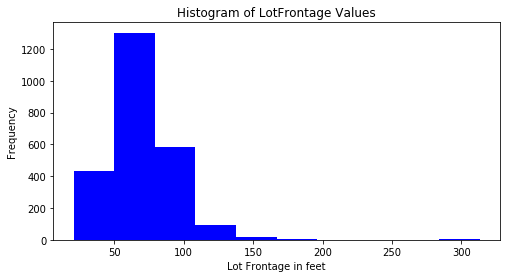

In [45]:
plt.figure(figsize = (8,4))

plt.hist(dat.loc[:,'LotFrontage'].dropna(), histtype = 'stepfilled', color = 'blue')
plt.xlabel('Lot Frontage in feet')
plt.ylabel('Frequency')
plt.title('Histogram of LotFrontage Values')

plt.show()

Ignoring the few outliers, the value for <code>LotFrontage</code> follows a near normal distribution and hence we assign the mean value to the rows with missing value.

In [46]:
dat.loc[:, 'LotFrontage'].fillna(value = dat.loc[:, 'LotFrontage'].dropna().mean(), inplace = True)

#### Other Categorical and Like Features

We now consider the list of features with few missing values. In this we include categorical features and some numerical features that take integer values and have a small range of values. Specifically we include: <code>BsmtFullBath, BsmtHalfBath, GarageCars, MSZoning, Utilities, Exterior1st, Exterior2nd, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, KitchenQual, Functional, GarageFinish, GarageQual, GarageCond, PoolQC, MiscFeature, SaleType, MasVnrType</code>.

We impute the respective <i>mode</i> value of the feature to the missing records.

In [47]:
feats = ['BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 
         'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'KitchenQual', 
         'Functional', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'MiscFeature', 'SaleType', 
         'MasVnrType']

for feat in feats:
    dat.loc[:, feat].fillna(value = dat.loc[:, feat].dropna().mode()[0], inplace = True)

#### Other Numerical Features

We now work on the remaining numerical features. Specifically we consider: <code>BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, GarageArea</code>.

Each of the features <code>BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF</code> report one record with missing data. We ascertain if it is the same record that reports missing value for all these features.

For all the features, we also look at the density plot to decide on the strategy to impute missing values.

In [48]:
dat.loc[dat.loc[:, 'BsmtFinSF1'].isna(), ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
660,NaN,NaN,NaN,NaN


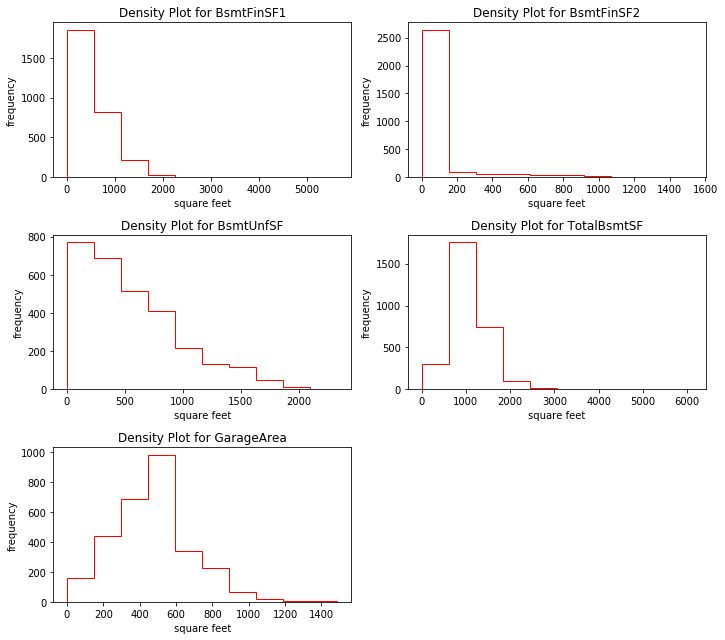

In [49]:
feats = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']

plt.figure(figsize = (10,9))

for i in range(len(feats)):
    plt.subplot(3,2,i+1)
    plt.hist(dat.loc[:, feats[i]].dropna(), histtype = 'step', color = 'red')
    plt.xlabel('square feet')
    plt.ylabel('frequency')
    plt.title('Density Plot for %s' % feats[i])
    
plt.tight_layout()
plt.show()

Indeed the same record reports missing data for <code>BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF</code>. This means, for that record, if we impute values to <code>BsmtFinSF1, BsmtFinSF2, BsmtUnfSF</code>, we can derive the value for <code>TotalBsmtSF</code>.

The density plots for <code>BsmtFinSF1, BsmtFinSF2, BsmtUnfSF</code> are significantly skewed. For these features we impute the median value of the remaining records for the missing value. For <code>TotalBsmtSF</code>, for the missing value, we calculate it as the sum of values for <code>BsmtFinSF1, BsmtFinSF2, BsmtUnfSF</code>.

Ignoring the few outliers, the density plot for <code>GarageArea</code> is nearly normal and we impute the mean value of the remaining records for the missing value.

In [50]:
feats = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']

for feat in feats:
    dat.loc[:, feat].fillna(value = dat.loc[:, feat].median(skipna = True), inplace = True)

[a, b, c] = dat.loc[dat.loc[:, 'TotalBsmtSF'].isna(), feats].values[0]
dat.loc[:, 'TotalBsmtSF'].fillna(value = a+b+c, inplace = True)

dat.loc[:, 'GarageArea'].fillna(value = dat.loc[:, 'GarageArea'].mean(skipna = True), inplace = True)

#### GarageYrBlt

Using domain knowledge, we hypothize that garages are usually built when a house is constructed or remodelled. We compare the construction years of the house and the garage to test this hypothesis

In [51]:
dat.loc[:, ['YearBuilt', 'GarageYrBlt']].dropna().query('YearBuilt == GarageYrBlt').count()

YearBuilt      2216
GarageYrBlt    2216
dtype: int64

Our hypothesis is highly likely to be true, given the number of records that have the house and the garage built in the same year.

We assign, for records with missing values for <code>GarageYrBlt</code>, the value of the corresponding <code>YearBuilt</code>.

In [52]:
dat.loc[dat.loc[:, 'GarageYrBlt'].isna(), 'GarageYrBlt'] = dat.loc[dat.loc[:, 'GarageYrBlt'].isna(), 'YearBuilt']

We reconfirm that we have indeed imputed all missing values

In [53]:
pd.set_option('display.max_rows', 100)
dat.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

### Data Pre-processing

The year in which a house is built in itself conveys no information. However, it can be used to ascertain the age of the house when sold. We add a numerical feature <code>AgeSold</code>, the age of the house when it was sold, as <code>YrSold</code> - <code>YearBuilt</code>. As a result, we can drop the column <code>YearBuilt</code> from the feature matrix. 

(<i>We don't drop the feature <code>YrSold</code> because it may capture the seasonality in housing price - the increase in prices of houses in some years tends to be higher than trend and in some other years lower than the  trend.</i>)

According to the <b>Data Description</b> file:

<code>YearRemodAdd</code>: Remodel date (same as construction date if no remodeling or additions).

We add a categorial feature <code>RemodAdd</code> that takes values <i>True/False</i> depending on whether a remodel was added. As a result, we can drop the column <code>YearRemodAdd</code> from the feature matrix.

Finally, we note that not all properties have a garage and for those that do, in a large majority of the case the garage was built in the same year as the house. For a large majority of houses that have a garage, <code>YearBuilt</code> captures the same information as <code>GarageYrBlt</code>. This insight allows us to add another categorical feature <code>Garage</code> that takes values <i>True/False</i> depending on whether a garage is present. As a result, we can drop the column <code>GarageYrBlt</code> from the feature matrix.

In [54]:
dat['AgeSold'] = dat['YrSold'] - dat['YearBuilt']
dat['RemodAdd'] = dat['YearRemodAdd'].ne(dat['YearBuilt'])
dat['Garage'] = dat['GarageYrBlt'].ne('ABSNT')
dat.drop(['YearBuilt', 'YearRemodAdd','GarageYrBlt'], axis = 'columns', inplace = True)

'''int_64_feats = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']

float_64_feats = []



dat[int_64_feats] = dat[int_64_feats].astype('int64')
dat[float_64_feats] = dat[float_64_feats].astype('float64')
dat[cat_feats] = dat[cat_feats].astype('category')'''

"int_64_feats = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', \n                'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']\n\nfloat_64_feats = []\n\n\n\ndat[int_64_feats] = dat[int_64_feats].astype('int64')\ndat[float_64_feats] = dat[float_64_feats].astype('float64')\ndat[cat_feats] = dat[cat_feats].astype('category')"

Machine learning algorithms, to deliver meaningful results, almost always require that the <i>numerical</i> features are mean scaled and centred. We therefore scale and center <code>LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal</code>.

<i>We do not scale and center the other numerical features as these take values over a small range and scaling is likely to have minimal impact.</i>

Finally, we one-hot encode the <i>categorical</i> features.

In [57]:
num_feats = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
             '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
             'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

cat_feats = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
             'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 
             'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 
             'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
             'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 
             'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 
             'MiscFeature', 'SaleType', 'SaleCondition', 'RemodAdd', 'Garage']

from sklearn.preprocessing import StandardScaler
dat[num_feats] = StandardScaler().fit_transform(dat[num_feats])

dat = pd.get_dummies(dat, columns = cat_feats)

### Save Data

We split the data back into <i>train</i> and <i>test</i> datasets and save these two and <code>y_train</code> for future processing.

In [61]:
train = dat[:n_train]
test = dat[n_train:]
train.to_hdf('../wip-data/train.h5', key = 'df', mode = 'w')
test.to_hdf('../wip-data/test.h5', key = 'df', mode = 'w')
y_train.to_hdf('../wip-data/y_train.h5', key = 'df', mode = 'w')